In [526]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [527]:
df = pd.read_csv('data/fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


Clean data

In [529]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [530]:
df.shape

(1238, 1)

Draw line plot

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

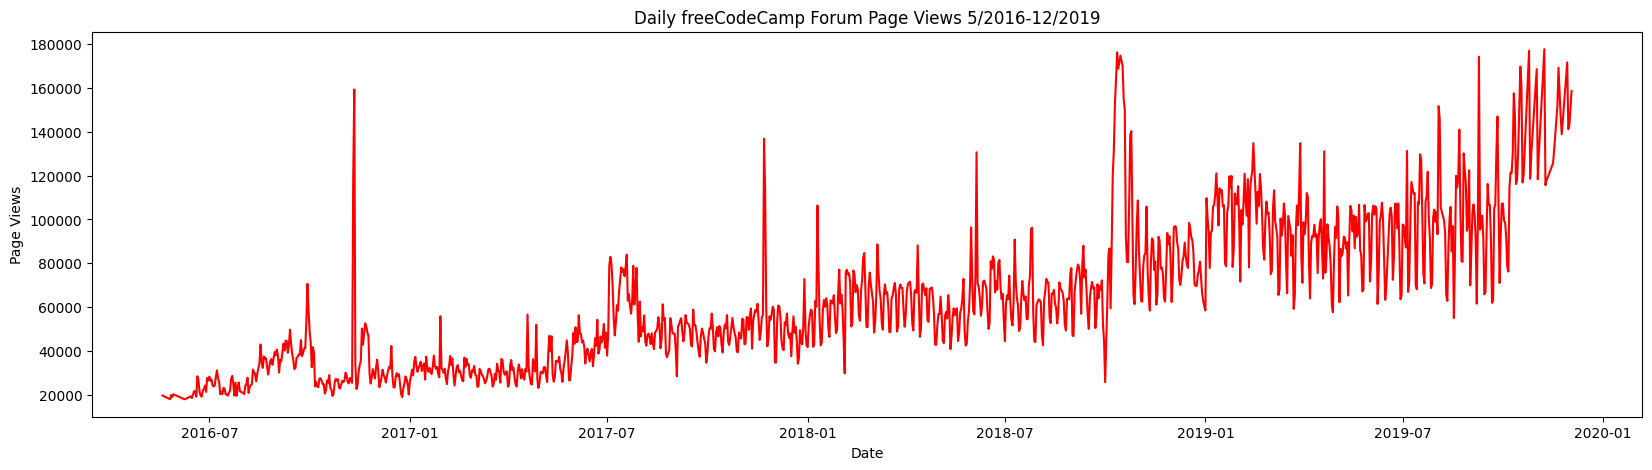

In [531]:
fig, axes = plt.subplots(figsize=(20, 5))

axes.plot(df.index, df['value'], color='red')

axes.set_xlabel('Date')
axes.set_ylabel('Page Views')
axes.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

Draw Bar Plot

In [532]:
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016


In [533]:
# Copy and modify data for monthly bar plot
# It should show average daily page views for each month grouped by year. 

df_bar = df.groupby(by=['year', 'month'])['value'].mean()
df_bar

year  month
2016  5         19432.400000
      6         21875.105263
      7         24109.678571
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       111378.142857
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
  

In [534]:
df_bar = df_bar.unstack()
df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0.0, '0'),
  Text(0, 20000.0, '20000'),
  Text(0, 40000.0, '40000'),
  Text(0, 60000.0, '60000'),
  Text(0, 80000.0, '80000'),
  Text(0, 100000.0, '100000'),
  Text(0, 120000.0, '120000'),
  Text(0, 140000.0, '140000'),
  Text(0, 160000.0, '160000')])

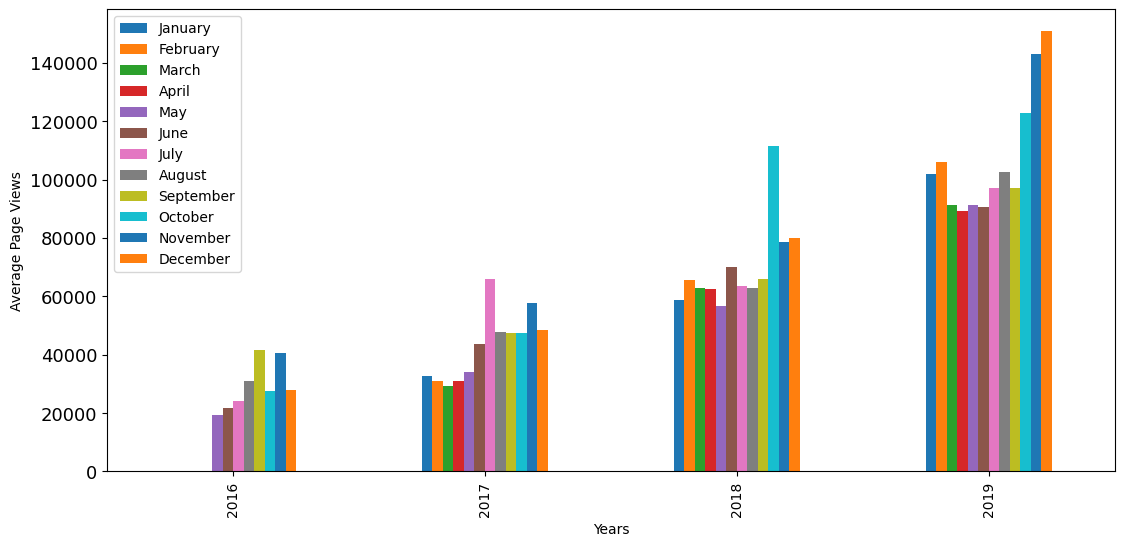

In [535]:
# Draw bar plot
fig = df_bar.plot.bar(legend=True, figsize=(13, 6), ylabel='Average Page Views', xlabel='Years').figure

plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=13)

Draw_box_plot

In [536]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.month for d in df_box.date]
df_box = df_box.sort_values(by='month', ascending=True)
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box.head()

,date,value,month,year
210,2017-01-06,37353,Jan,2017
937,2019-01-06,94108,Jan,2019
936,2019-01-05,77897,Jan,2019
935,2019-01-04,94514,Jan,2019
934,2019-01-03,100710,Jan,2019


Text(0, 0.5, 'Page Views')

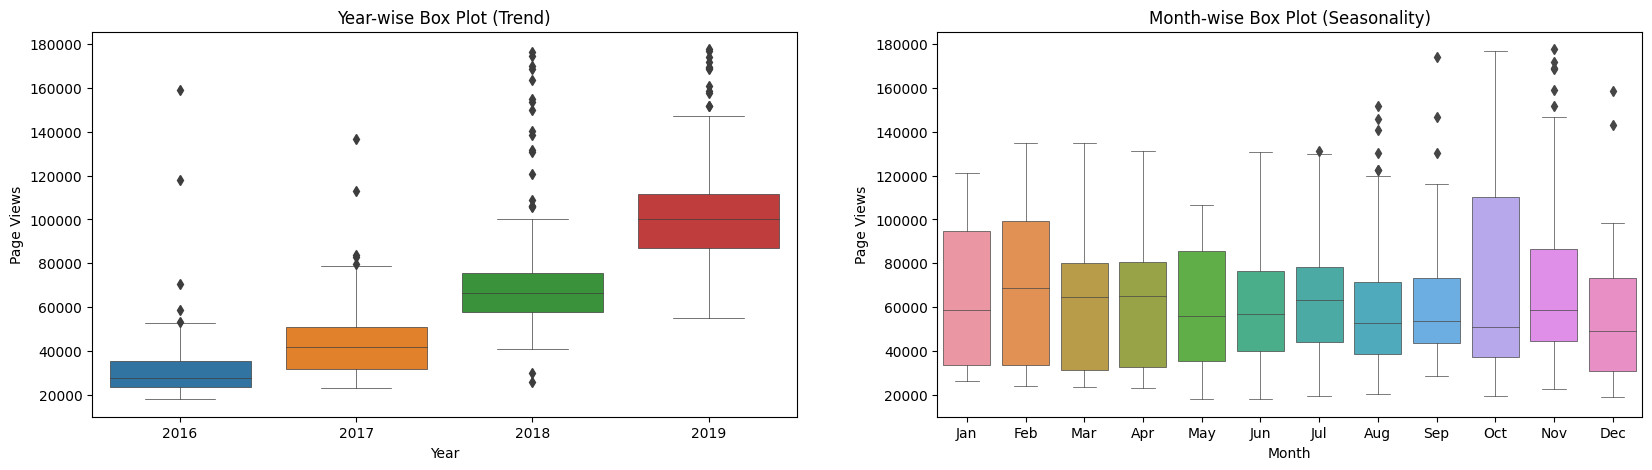

In [537]:
# Draw box plots (using Seaborn)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0], linewidth=0.5)
axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1], linewidth=0.5)

axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')